In [34]:
from utils.bayes import bayesPredict
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import test_result
from utils.mean_variance import *
import os
%load_ext autoreload
%autoreload 2

crt_dir = os.path.abspath("")
data_dir = os.path.abspath("data")
file1 = os.path.join(data_dir, "000300.csv")
file2 = os.path.join(data_dir, "Monthly_Excess_Return_Rates.csv")
CSI300_df = pd.read_csv(file1, index_col=1, parse_dates=True)['Idxrtn']
excessR_df = pd.read_csv(file2)
bayesR_df = bayesPredict(excessR_df, agent_type=0.8)
print('Bayes prediction:')
bayesR_df.tail()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Bayes prediction:


,600000,600009,600010,600015,600016,600019,600028,600029,600030,600031,...,601398,601600,601601,601628,601766,601857,601899,601939,601988,601998
Trdmnt,,,,,,,,,,,,,,,,,,,,,
2022-07-01,-0.018200,0.001558,-0.068344,-0.006842,-0.007288,-0.055853,-0.005488,0.003187,-0.028746,-0.047775,...,-0.002047,-0.074322,-0.026044,-0.014881,-0.036716,-0.015582,-0.032205,-0.003852,0.000997,-0.008763
2022-08-01,-0.022376,-0.007839,-0.056228,-0.008197,-0.008068,-0.046694,-0.010268,-0.012557,-0.037911,-0.056000,...,-0.005333,-0.075214,-0.039156,-0.026242,-0.028412,-0.024321,-0.026501,-0.008124,0.001113,-0.010089
2022-09-01,-0.021700,-0.012388,-0.055913,-0.008786,-0.008699,-0.036981,-0.001327,-0.022679,-0.037919,-0.053545,...,-0.005530,-0.056622,-0.036854,-0.018364,-0.023174,-0.017129,-0.030946,-0.008363,0.000384,-0.007104
2022-10-01,-0.019562,0.010457,-0.066273,-0.011284,-0.016011,-0.029217,0.009401,-0.012309,-0.041212,-0.061545,...,-0.004116,-0.049131,-0.038600,-0.014933,-0.032223,-0.003985,-0.040037,-0.005090,0.001946,-0.004447
2022-11-01,-0.026153,-0.004084,-0.067093,-0.016317,-0.018947,-0.039678,-0.001847,-0.024176,-0.049774,-0.067237,...,-0.010414,-0.067440,-0.044609,-0.033333,-0.031233,-0.012721,-0.034898,-0.010358,-0.001232,-0.012749


In [43]:
#excessR_df.index = pd.to_datetime(excessR_df['Trdmnt'])
excessR_df = pd.read_csv(file2, index_col=0, parse_dates=True)
excessR_df = excessR_df.fillna(0)
rf_df = pd.read_csv(os.path.join(data_dir, "Monthly_rf_Rates.csv"), index_col=0, parse_dates=True)
rf_df = rf_df.fillna(0)
R_df = pd.read_csv(os.path.join(data_dir, "Monthly_Return_Rates.csv"), index_col=0, parse_dates=True)
R_df = R_df.fillna(0)
print('Excess return (true data)')
excessR_df.tail()

Excess return (true data)


,600000,600009,600010,600015,600016,600019,600028,600029,600030,600031,...,601398,601600,601601,601628,601766,601857,601899,601939,601988,601998
Trdmnt,,,,,,,,,,,,,,,,,,,,,
2022-07-01,-0.044177,-0.091541,-0.039539,-0.018516,-0.022746,-0.059381,0.006112,-0.125728,-0.096347,-0.107222,...,-0.023287,-0.018083,-0.103647,-0.084043,-0.010857,-0.020109,-0.044113,-0.023507,0.006556,-0.020058
2022-08-01,0.000136,0.092594,-0.111860,0.002665,-0.012230,-0.061206,0.037689,0.005009,0.022398,-0.076945,...,-0.001241,-0.028663,0.037392,0.100302,0.006736,0.025682,-0.015799,-0.010218,-0.007777,0.026282
2022-09-01,-0.032878,0.022864,-0.085818,-0.022642,-0.059574,-0.014374,0.041899,0.029815,-0.108823,-0.119971,...,-0.008090,-0.085498,-0.031761,0.029052,-0.065113,-0.002847,-0.110332,-0.001241,0.015206,0.016616
2022-10-01,-0.058059,-0.077392,-0.044719,-0.048955,-0.027790,-0.054707,-0.052523,-0.028350,-0.013296,-0.028619,...,-0.047218,-0.066616,-0.065186,-0.160267,0.011552,-0.067518,0.008963,-0.033850,-0.027131,-0.051680
2022-11-01,0.086108,0.038100,0.129441,0.092705,0.065426,0.171316,0.111781,0.152010,0.150415,0.177278,...,0.034904,0.156790,0.277792,0.357782,0.127180,0.092705,0.239921,0.045575,0.045270,0.160422


In [44]:
constraint_list = [cons_non_negative_weight(), cons_sum_weight_upper_bound(1.5)]
R_excess_hat, w_hat = portfolio2(Bayes_df=bayesR_df, R_excess_df=excessR_df, momentum_period=2, rank=20, momentum_atLeast=0, num_atLeast=1, objective=obj_Exp_minus_RC, constraints=constraint_list)

[12 19 38  5 45 20 46 47  6 43 41 51 29 26 22 37  3 32  9 33]
current month 2017-01-01 00:00:00 The Bayesian prediction of this month return
600050    0.031205
600362    0.000734
601186   -0.002608
600019    0.005479
601628   -0.002155
600383   -0.030873
601766   -0.020897
601857   -0.000689
600028    0.014552
601600   -0.025551
601390   -0.003413
601998    0.003494
600795    0.000763
600660    0.021076
600519    0.029956
601169    0.010485
600015    0.004085
601006    0.003250
600031    0.003641
601009    0.014385
Name: 2017-01-01 00:00:00, dtype: float64
[ 6 17 47 43 19 24 22  9  5 16 51 49 10 40 18 50 34 42 36 14]
current month 2017-02-01 00:00:00 The Bayesian prediction of this month return
600028    0.014946
600309    0.036983
601857    0.000761
601600   -0.009307
600362    0.006629
600585    0.000290
600519    0.022454
600031    0.001979
600019    0.009259
600196    0.009461
601998    0.001280
601939    0.011767
600036    0.005939
601328    0.002651
600352   -0.023034
601988    0

In [45]:
R_net_hat = np.sum(R_excess_hat, axis=1) + \
    rf_df[rf_df.index >= pd.Timestamp("2017")].values.reshape(-1,)
R_net_hat_df = pd.DataFrame(R_net_hat, columns=[
                            'return'], index=CSI300_df[CSI300_df.index >= pd.Timestamp("2017")].index)

test_result.calculate_result(R_net_hat_df, rf_df[rf_df.index >= pd.Timestamp("2017")])

,accu_return,annual_return,annual_vol,sharpe_ratio,max_dd,winning_rate,karmar
0,0.407464,0.059468,1.429403,0.034608,-0.540669,0.591549,0.753628


In [46]:
ew_rets = pd.DataFrame(np.sum(
    1.0*R_df[R_df.index >= pd.Timestamp("2017")]/R_df.shape[1], axis=1), columns=['return'])
rf_rets = pd.DataFrame(
    rf_df[rf_df.index.year>=2017].values, columns=['return'], index=CSI300_df[CSI300_df.index >= pd.Timestamp("2017")].index
)

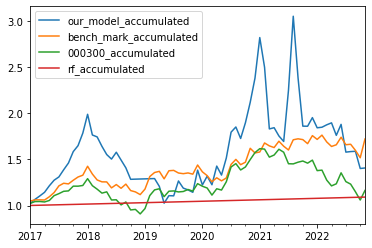

In [47]:
p_cum = (R_net_hat_df['return'] + 1).cumprod()
ew_cum = (ew_rets['return'] + 1).cumprod()
CSI300_cumrets = (CSI300_df[CSI300_df.index.year >= 2017] + 1).cumprod()
rf_cumrets = (rf_rets+1).cumprod()
pd.concat([p_cum, ew_cum, CSI300_cumrets, rf_cumrets], axis=1).plot()
plt.legend(['our_model_accumulated',
           'bench_mark_accumulated', '000300_accumulated', 'rf_accumulated'])
plt.show()
